# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loading the dataset

In [2]:
df=pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
df.shape

(119390, 36)

In [16]:
df.drop(["email", "name", "phone-number","credit_card"],axis=1, inplace=True)

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Removed the private data from the dataset such as phone-number, credit-card and all**

In [19]:
df.shape

(119390, 32)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [21]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [24]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [26]:
for col in df.describe(include= "object").columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [32]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

**Removed the columns named company and agent**

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [38]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


**Removing some visible ooutliers**

In [37]:
df=df[df['adr']<5000]

# Data Analysis and Visualizations

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


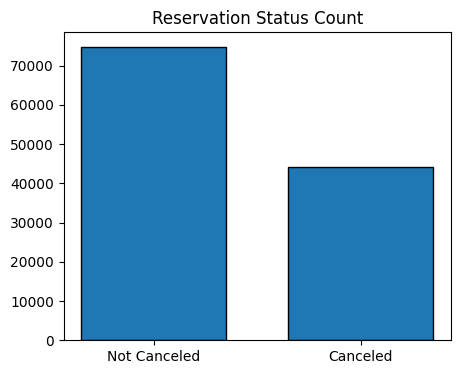

In [53]:
cancelled_percentage= df['is_canceled'].value_counts(normalize=True)
print(cancelled_percentage)


plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(['Not Canceled','Canceled'], df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()

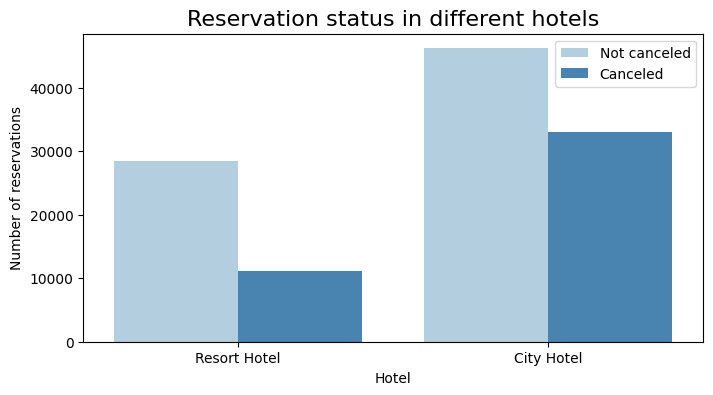

In [65]:
plt.figure(figsize=(8, 4))

ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')

plt.title('Reservation status in different hotels', size=16)

plt.xlabel('Hotel')

plt.ylabel('Number of reservations')

legend_labels, _ = ax1.get_legend_handles_labels()

custom_labels = ['Not canceled', 'Canceled']

ax1.legend(legend_labels, custom_labels, loc='upper right')





In [66]:
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [67]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [68]:
resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

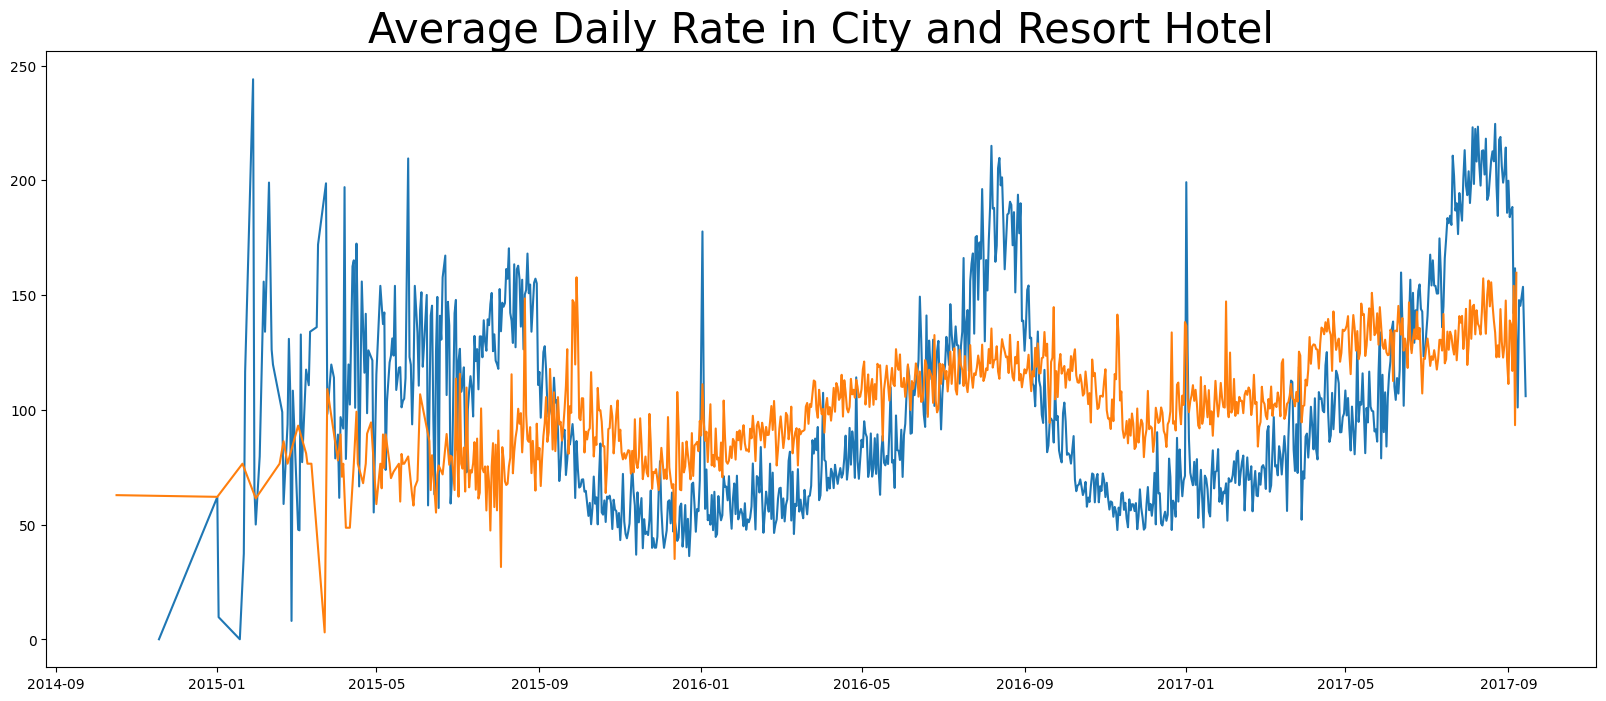

In [71]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label= 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label= 'City Hotel')
plt.show()

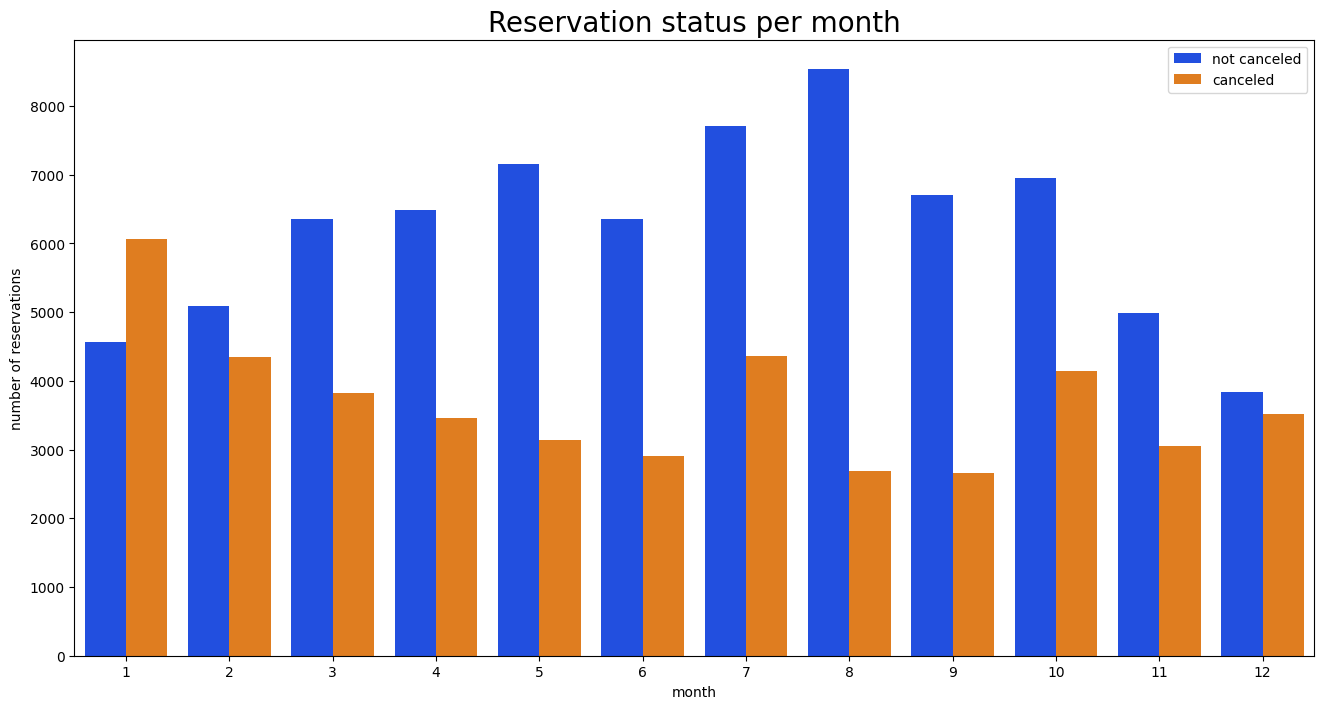

In [75]:
df['month']= df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1= sns.countplot(x= 'month', hue= 'is_canceled', data=df, palette= 'bright')
legend_labels,_= ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

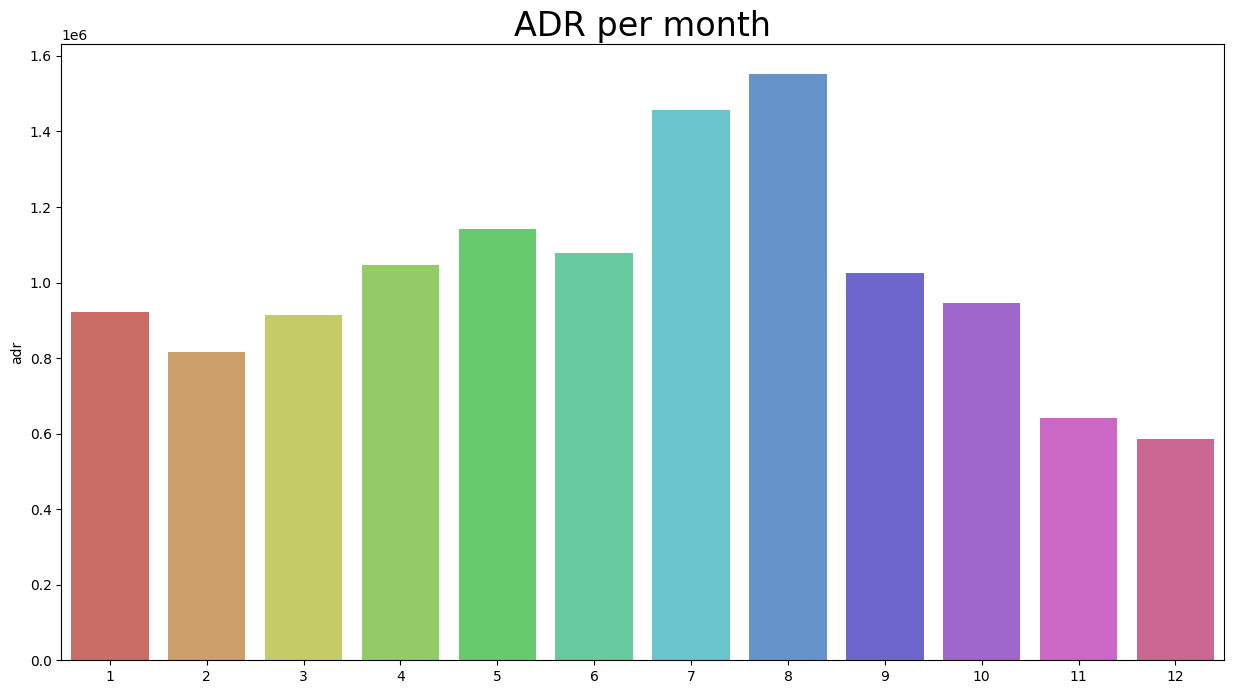

In [81]:
# 1. Correct Data Calculation: Sum ADR for ALL reservations per month
adr_per_month = df.groupby('month')[['adr']].sum().reset_index()

# 2. Define a color palette that closely matches the image's distinct colors
palette = sns.color_palette("hls", n_colors=12)

plt.figure(figsize=(15, 8))

# 3. Use the corrected data and apply the palette
sns.barplot(x='month', y='adr', data=adr_per_month, palette=palette)

# 4. Adjust the title size (using 24 is closer to the visual)
plt.title("ADR per month", fontsize=24) 

# 5. Adjust Axis Labels to match the image
plt.xlabel('') # Remove x-axis label
plt.ylabel('adr') # Set y-axis label

plt.show()

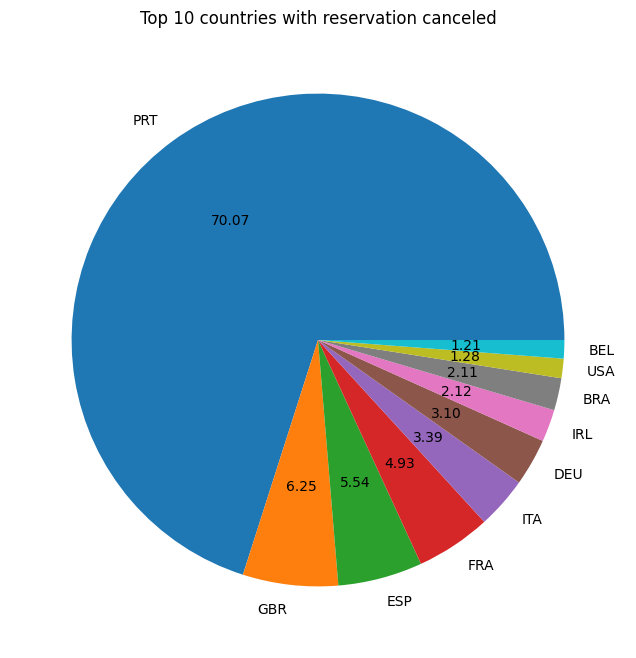

In [83]:
canceled_data= df[df['is_canceled']==1]
top_10_country= canceled_data['country'].value_counts()[:10]
plt.figure(figsize= (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct= '%.2f', labels=top_10_country.index)
plt.show()

In [84]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [85]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [86]:
canceled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

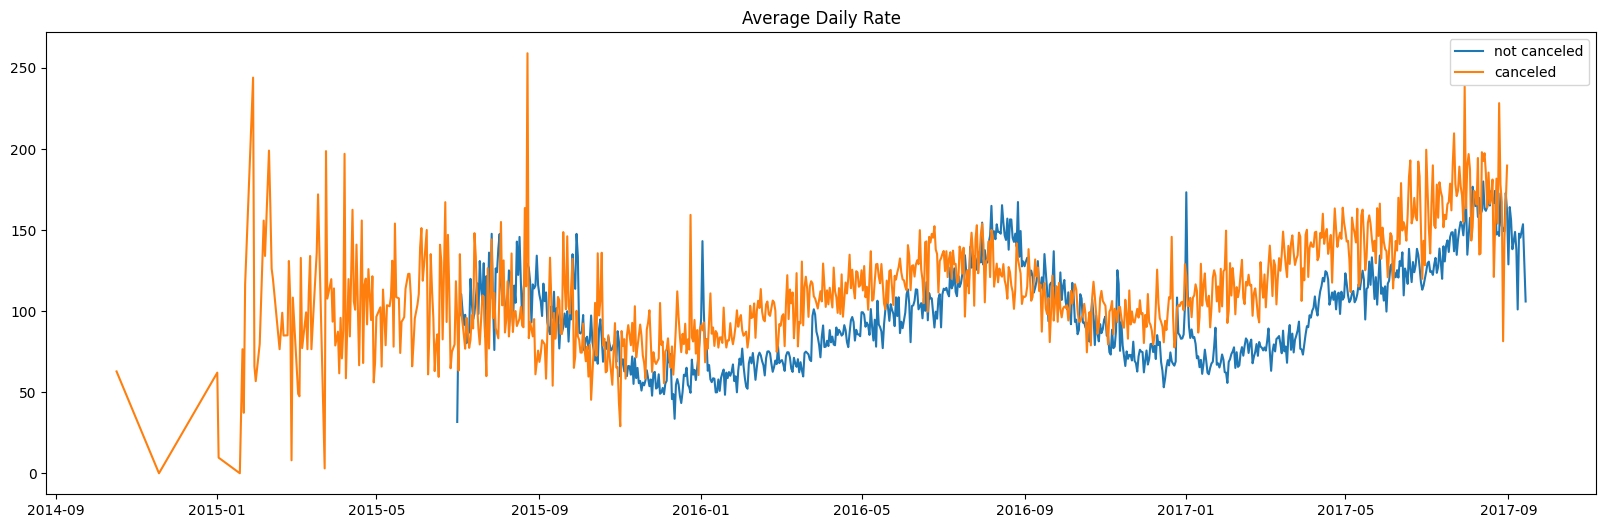

In [93]:
canceled_df_adr = canceled_data.groupby('reservation_status_date') [['adr']].mean()
canceled_df_adr.reset_index(inplace = True)
canceled_df_adr.sort_values('reservation_status_date', inplace = True)

not_canceled_data= df[df['is_canceled']==0]
not_canceled_df_adr = not_canceled_data.groupby( 'reservation_status_date' )[['adr']] .mean()
not_canceled_df_adr.reset_index(inplace = True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace = True)

plt. figure(figsize = (20,6))
plt.title( 'Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'], label ='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'], label='canceled')
plt. legend()

In [95]:
canceled_df_adr= canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2016') & (canceled_df_adr['reservation_status_date'] < '2017-09')]
not_canceled_df_adr= not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date']>'2016') & (not_canceled_df_adr['reservation_status_date']< '2017-09')]                                                                                      

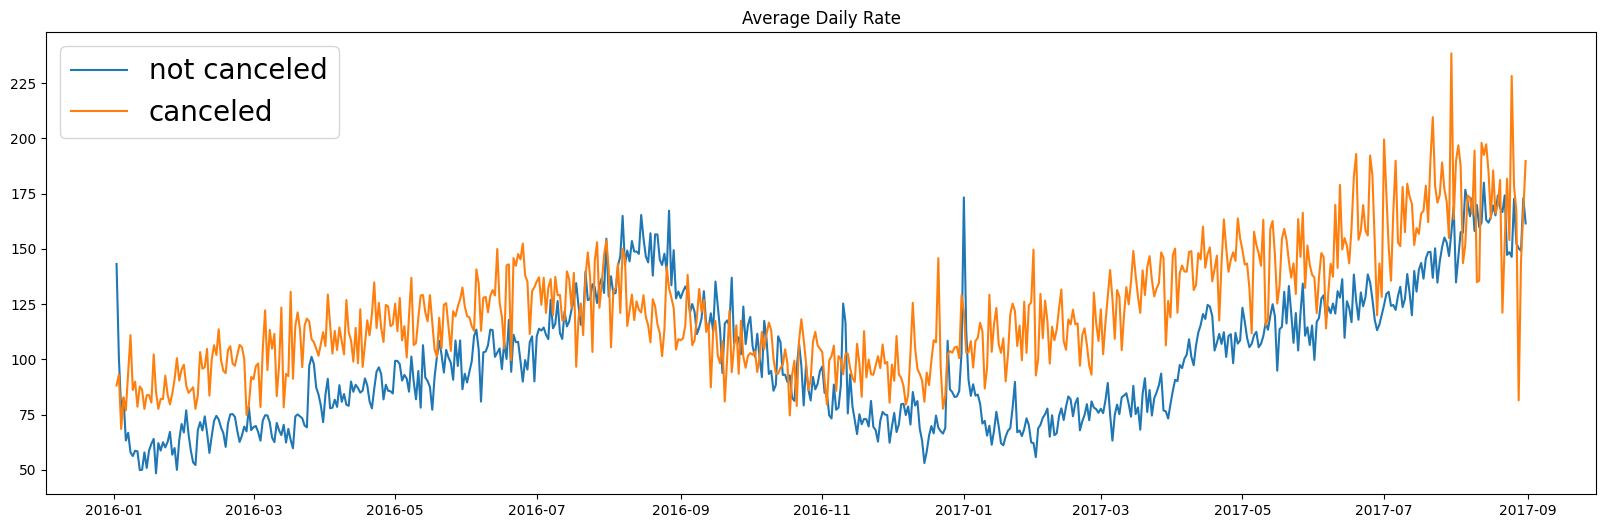

In [98]:


plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')

# x = reservation_status_date, y = adr
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='canceled')

plt.legend(fontsize=20)
plt.show()

In [ ]:
jupyter nbconvert --to markdown Unlocking_HotelBooking_Data.ipynb

In [ ]:
sections = {
    "📌 Introduction": 
        "This project analyzes hotel booking data to uncover insights about booking patterns, cancellations, and revenue trends.",

    "📊 Dataset Overview": 
        "- Dataset contains booking records for City and Resort hotels.\n- Key columns: reservation_status_date, adr, is_canceled, etc.",

    "📈 Exploratory Data Analysis": 
        "We explore booking trends, cancellations, ADR (Average Daily Rate), and seasonal demand.",

    "🔑 Key Insights": 
        "- Higher booking volume in City hotels\n- Cancellations affect revenue significantly\n- ADR peaks during holiday seasons",

    "✅ Conclusion": 
        "This analysis highlights important patterns in hotel bookings that can be used for pricing, demand forecasting, and reducing cancellations."
}

for title, content in sections.items():
    report_section(title, content)

In [ ]:
sections

In [ ]:
jupyter nbconvert --to pdf Unlocking_HotelBooking_Data.ipynb

In [ ]:
from IPython.display import Markdown, display

def report_section(title, content):
    display(Markdown(f"## {title}\n{content}"))

# Example usage:
report_section("📌 Introduction", 
"""
This project analyzes hotel booking data to uncover insights about guest behavior, 
cancellations, seasonality, and revenue patterns.
""")

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

df = pd.read_csv("hotel_bookings.csv")  # your dataset
profile = ProfileReport(df, title="Hotel Booking EDA Report", explorative=True)
profile.to_file("Hotel_Booking_Report.html")